In [42]:
import math
import numpy as np
import pylab as pl
import random as rnd
import time
%matplotlib inline
import matplotlib.pyplot as pl
%matplotlib inline

In [43]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

In [9]:
def matrixM(A, B):
    assert len(A) == len(A[0]) 
    assert len(B) == len(B[0]) 
    assert len(A) == len(B)
    size = len(A)
    C = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            for k in range(size):
                C[i][j] += A[i][k] * B [k][j]
    return C

In [10]:

A = np.random.randint(10, size = (5,5))
B = np.random.randint(10, size = (5,5))
print A
print ""
print B
print ""
C = matrixM(A, B)
print C

[[8 1 8 6 1]
 [4 6 1 0 4]
 [4 7 3 0 1]
 [6 9 5 3 4]
 [9 8 0 7 0]]

[[6 4 8 7 3]
 [7 4 6 9 0]
 [1 2 8 9 6]
 [6 2 5 9 6]
 [9 0 7 3 7]]

[[ 108.   64.  171.  194.  115.]
 [ 103.   42.  104.  103.   46.]
 [  85.   50.  105.  121.   37.]
 [ 158.   76.  185.  207.   94.]
 [ 152.   82.  155.  198.   69.]]


In [22]:
def matrixAdicion(A, B):
    assert len(A) == len(B)
    assert len(A[0]) == len(B[0])
    C = np.zeros((len(A), len(A[0])))
    for i in range(len(A)):
        for j in range(len(A[0])):
            C[i][j] = A[i][j] + B[i][j]
    return C

In [23]:
def matrixM(A, B):
    assert len(A) == len(A[0])
    assert len(B) == len(B[0])
    assert len(A) == len(B)
    if len(A) % 2 == 0 and len(A[0]) % 2 == 0 and len(A) > 2:
        # Creating submatrices
        mid = len(A)/2
        end = len(A)
        a = A[0:mid, 0:mid]
        b = A[0:mid, mid:end]
        c = A[mid:end, 0:mid]
        d = A[mid:end, mid:end]
        e = B[0:mid, 0:mid]
        f = B[0:mid, mid:end]
        g = B[mid:end, 0:mid]
        h = B[mid:end, mid:end]
        # Multiplying smaller submatrices
        ae = matrixM(a, e)
        bg = matrixM(b, g)
        af = matrixM(a, f)
        bh = matrixM(b, h)
        ce = matrixM(c, e)
        dg = matrixM(d, g)
        cf = matrixM(c, f)
        dh = matrixM(d, h)
        # Adding multiplications
        Cul = matrixAdicion(ae, bg)
        Cur = matrixAdicion(af, bh)
        Cdl = matrixAdicion(ce, dg)
        Cdr = matrixAdicion(cf, dh)
        # Composing matrix
        Cu = np.c_[Cul,Cur]
        Cd = np.c_[Cdl,Cdr]
        C = np.r_[Cu, Cd]
        return C      
    else:
        return matrixMultiply(A, B)

In [25]:
A = np.random.randint(10, size = (5,5))
B = np.random.randint(10, size = (5,5))
print A
print ""
print B
print ""
C1 = matrixM(A, B)
C2 = matrixM(A, B)
print C1
print ""
print C2

[[1 2 0 4 0]
 [5 0 0 4 7]
 [3 1 8 3 2]
 [7 7 9 6 5]
 [9 6 4 2 3]]

[[7 7 8 6 5]
 [7 1 7 4 9]
 [7 4 1 0 8]
 [0 1 1 5 9]
 [6 8 8 6 5]]

[[  21.   13.   26.   34.   59.]
 [  77.   95.  100.   92.   96.]
 [  96.   73.   58.   49.  125.]
 [ 191.  138.  160.  130.  249.]
 [ 151.  111.  144.  106.  164.]]

[[  21.   13.   26.   34.   59.]
 [  77.   95.  100.   92.   96.]
 [  96.   73.   58.   49.  125.]
 [ 191.  138.  160.  130.  249.]
 [ 151.  111.  144.  106.  164.]]


In [26]:
<h>3. Algoritmo de Strassen</h>

SyntaxError: invalid syntax (<ipython-input-26-2bbcd32bebeb>, line 1)

In [47]:
def new_m(p, q, acct):
    matrix = [[0 for row in range(p)] for col in range(q)]; acct.count()
    return matrix

def add_m(a, b, acct):
    if type(a) == int:
        acct.count()
        d = a + b; acct.count()
    else:
        acct.count()
        d = []; acct.count()
        for i in range(len(a)):
            acct.count()
            c = []; acct.count()
            for j in range(len(a[0])):
                acct.count()
                c.append(a[i][j] + b[i][j]); acct.count()
            d.append(c)
    return d

def sub_m(a, b, acct):
    if type(a) == int:
        acct.count()
        d = a - b; acct.count()
    else:
        d = []; acct.count()
        for i in range(len(a)):
            acct.count()
            c = []; acct.count()
            for j in range(len(a[0])):
                acct.count()
                c.append(a[i][j] - b[i][j]); acct.count()
            d.append(c)
    return d

def strassen(a, b, q, acct):
    # base case: 1x1 matrix
    if q == 1:
        acct.count()
        d = [[0]]; acct.count()
        d[0][0] = a[0][0] * b[0][0]; acct.count()
        return d
    else:
        acct.count()
        #split matrices into quarters
        a11, a12, a21, a22 = split(a, acct);  acct.count()
        b11, b12, b21, b22 = split(b, acct);  acct.count()

        # p1 = (a11+a22) * (b11+b22)
        p1 = strassen(add_m(a11,a22, acct), add_m(b11,b22, acct), q/2, acct);  acct.count()
        # p2 = (a21+a22) * b11
        p2 = strassen(add_m(a21,a22, acct), b11, q/2, acct);  acct.count()
        # p3 = a11 * (b12-b22)
        p3 = strassen(a11, sub_m(b12,b22, acct), q/2, acct);  acct.count()
        # p4 = a22 * (b12-b11)
        p4 = strassen(a22, sub_m(b21,b11, acct), q/2, acct);  acct.count()
        # p5 = (a11+a12) * b22
        p5 = strassen(add_m(a11,a12, acct), b22, q/2, acct);  acct.count()
        # p6 = (a21-a11) * (b11+b12)
        p6 = strassen(sub_m(a21,a11, acct), add_m(b11,b12, acct), q/2, acct);  acct.count()
        # p7 = (a12-a22) * (b21+b22)
        p7 = strassen(sub_m(a12,a22, acct), add_m(b21,b22, acct), q/2, acct);  acct.count()

        # c11 = p1 + p4 - p5 + p7
        c11 = add_m(sub_m(add_m(p1, p4, acct), p5, acct), p7, acct);  acct.count()
        # c12 = p3 + p5
        c12 = add_m(p3, p5, acct);  acct.count()
        # c21 = p2 + p4
        c21 = add_m(p2, p4, acct);  acct.count()
        # c22 = p1 + p3 - p2 + p6
        c22 = add_m(sub_m(add_m(p1, p3, acct), p2, acct), p6, acct);  acct.count()

        c = new_m(len(c11)*2,len(c11)*2, acct);  acct.count()
        for i in range(len(c11)):
            acct.count()
            for j in range(len(c11)):
                acct.count()
                c[i][j]                   = c11[i][j];  acct.count()
                c[i][j+len(c11)]          = c12[i][j];  acct.count()
                c[i+len(c11)][j]          = c21[i][j];  acct.count()
                c[i+len(c11)][j+len(c11)] = c22[i][j];  acct.count()

        return c

In [51]:
def matrixSubstract(A, B):
    assert len(A) == len(B) 
    assert len(A[0]) == len(B[0])
    C = np.zeros((len(A), len(A[0])))
    for i in range(len(A)):
        for j in range(len(A[0])):
            C[i][j] = A[i][j] - B[i][j]
    return C

In [52]:
def matrixStrassen(A, B):
    assert len(A) == len(A[0])
    assert len(B) == len(B[0])
    assert len(A) == len(B)
    if len(A) % 2 == 0 and len(A[0]) % 2 == 0 and len(A) > 2:
        # Creating submatrices
        mid = len(A)/2
        end = len(A)
        a = A[0:mid, 0:mid]
        b = A[0:mid, mid:end]
        c = A[mid:end, 0:mid]
        d = A[mid:end, mid:end]
        e = B[0:mid, 0:mid]
        f = B[0:mid, mid:end]
        g = B[mid:end, 0:mid]
        h = B[mid:end, mid:end]
        # Strassen Ps
        P1 = matrixStrassen(a, matrixSubstract(f, h))
        P2 = matrixStrassen(matrixAdd(a, b), h)
        P3 = matrixStrassen(matrixAdd(c, d), e)
        P4 = matrixStrassen(d, matrixSubstract(g, e))
        P5 = matrixStrassen(matrixAdd(a, d), matrixAdd(e, h))
        P6 = matrixStrassen(matrixSubstract(b, d), matrixAdd(g, h))
        P7 = matrixStrassen(matrixSubstract(a, c), matrixAdd(e, f))
        # Computing Ps
        Cul = matrixAdd(matrixSubstract(matrixAdd(P5, P4), P2), P6)
        Cur = matrixAdd(P1, P2)
        Cdl = matrixAdd(P3, P4)
        Cdr = matrixSubstract(matrixSubstract(matrixAdd(P1, P5), P3), P7)
        # Composing matrix
        Cu = np.c_[Cul,Cur]
        Cd = np.c_[Cdl,Cdr]
        C = np.r_[Cu, Cd]
        return C    
    else:
        return matrixMultiply(A, B)

In [53]:
A = np.random.randint(9, size = (4,4))
B = np.random.randint(9, size = (4,4))
print A
print ""
print B
print ""
C1 = matrixMultiply(A, B)
C2 = matrixStrassen(A, B)
print C1
print ""
print C2

[[5 8 3 8]
 [6 1 0 5]
 [8 3 7 5]
 [7 1 0 0]]

[[0 5 0 7]
 [1 4 2 8]
 [5 2 7 0]
 [7 3 7 6]]

[[  79.   87.   93.  147.]
 [  36.   49.   37.   80.]
 [  73.   81.   90.  110.]
 [   1.   39.    2.   57.]]

[[  79.   87.   93.  147.]
 [  36.   49.   37.   80.]
 [  73.   81.   90.  110.]
 [   1.   39.    2.   57.]]


In [54]:
class Counter:
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

In [55]:
def acctMatrixMultiply(A, B, acct):
    assert len(A) == len(A[0]); acct.count()
    assert len(B) == len(B[0]); acct.count()
    assert len(A) == len(B); acct.count()
    size = len(A); acct.count()
    C = np.zeros((size, size)); acct.count()
    acct.count()
    for i in range(size):
        acct.count()
        for j in range(size):
            acct.count()
            for k in range(size):
                acct.count()
                C[i][j] += A[i][k] * B [k][j]; acct.count()
    return C


In [56]:
def acctMatrixAdd(A, B, acct):
    assert len(A) == len(B); acct.count()
    assert len(A[0]) == len(B[0]); acct.count()
    C = np.zeros((len(A), len(A[0]))); acct.count()
    acct.count()
    for i in range(len(A)):
        acct.count()
        for j in range(len(A[0])):
            acct.count()
            C[i][j] = A[i][j] + B[i][j]; acct.count()
    return C

In [57]:
def acctMatrixMultiplyDC(A, B, acct):
    assert len(A) == len(A[0]); acct.count()
    assert len(B) == len(B[0]); acct.count()
    assert len(A) == len(B); acct.count()
    acct.count()
    if len(A) % 2 == 0 and len(A[0]) % 2 == 0 and len(A) > 2:
        acct.count()
        # Creating submatrices
        mid = len(A)/2; acct.count()
        end = len(A); acct.count()
        a = A[0:mid, 0:mid]; acct.count()
        b = A[0:mid, mid:end]; acct.count()
        c = A[mid:end, 0:mid]; acct.count()
        d = A[mid:end, mid:end]; acct.count()
        e = B[0:mid, 0:mid]; acct.count()
        f = B[0:mid, mid:end]; acct.count()
        g = B[mid:end, 0:mid]; acct.count()
        h = B[mid:end, mid:end]; acct.count()
        # Multiplying smaller submatrices
        ae = acctMatrixMultiplyDC(a, e, acct); acct.count()
        bg = acctMatrixMultiplyDC(b, g, acct); acct.count()
        af = acctMatrixMultiplyDC(a, f, acct); acct.count()
        bh = acctMatrixMultiplyDC(b, h, acct); acct.count()
        ce = acctMatrixMultiplyDC(c, e, acct); acct.count()
        dg = acctMatrixMultiplyDC(d, g, acct); acct.count()
        cf = acctMatrixMultiplyDC(c, f, acct); acct.count()
        dh = acctMatrixMultiplyDC(d, h, acct); acct.count()
        # Adding multiplications
        Cul = acctMatrixAdd(ae, bg, acct); acct.count()
        Cur = acctMatrixAdd(af, bh, acct); acct.count()
        Cdl = acctMatrixAdd(ce, dg, acct); acct.count()
        Cdr = acctMatrixAdd(cf, dh, acct); acct.count()
        # Composing matrix
        Cu = np.c_[Cul,Cur]; acct.count()
        Cd = np.c_[Cdl,Cdr]; acct.count()
        C = np.r_[Cu, Cd]; acct.count()
        return C      
    else:
        return acctMatrixMultiply(A, B, acct)

In [58]:
def acctMatrixSubstract(A, B, acct):
    assert len(A) == len(B); acct.count()
    assert len(A[0]) == len(B[0]); acct.count()
    C = np.zeros((len(A), len(A[0]))); acct.count()
    acct.count()
    for i in range(len(A)):
        acct.count()
        for j in range(len(A[0])):
            acct.count()
            C[i][j] = A[i][j] - B[i][j]; acct.count()
    return C

In [59]:
def acctMatrixStrassen(A, B, acct):
    assert len(A) == len(A[0]); acct.count()
    assert len(B) == len(B[0]); acct.count()
    assert len(A) == len(B); acct.count()
    acct.count()
    if len(A) % 2 == 0 and len(A[0]) % 2 == 0 and len(A) > 2:
        acct.count()
        # Creating submatrices
        mid = len(A)/2; acct.count()
        end = len(A); acct.count()
        a = A[0:mid, 0:mid]; acct.count()
        b = A[0:mid, mid:end]; acct.count()
        c = A[mid:end, 0:mid]; acct.count()
        d = A[mid:end, mid:end]; acct.count()
        e = B[0:mid, 0:mid]; acct.count()
        f = B[0:mid, mid:end]; acct.count()
        g = B[mid:end, 0:mid]; acct.count()
        h = B[mid:end, mid:end]; acct.count()
        # Strassen Ps
        P1 = acctMatrixStrassen(a, acctMatrixSubstract(f, h, acct), acct); acct.count()
        P2 = acctMatrixStrassen(acctMatrixAdd(a, b, acct), h, acct); acct.count()
        P3 = acctMatrixStrassen(acctMatrixAdd(c, d, acct), e, acct); acct.count()
        P4 = acctMatrixStrassen(d, acctMatrixSubstract(g, e, acct), acct); acct.count()
        P5 = acctMatrixStrassen(acctMatrixAdd(a, d, acct), acctMatrixAdd(e, h, acct), acct); acct.count()
        P6 = acctMatrixStrassen(acctMatrixSubstract(b, d, acct), acctMatrixAdd(g, h, acct), acct); acct.count()
        P7 = acctMatrixStrassen(acctMatrixSubstract(a, c, acct), acctMatrixAdd(e, f, acct), acct); acct.count()
        # Computing Ps
        Cul = acctMatrixAdd(acctMatrixSubstract(acctMatrixAdd(P5, P4, acct), P2, acct), P6, acct); acct.count()
        Cur = acctMatrixAdd(P1, P2, acct); acct.count()
        Cdl = acctMatrixAdd(P3, P4, acct); acct.count()
        Cdr = acctMatrixSubstract(acctMatrixSubstract(acctMatrixAdd(P1, P5, acct), P3, acct), P7, acct); acct.count()
        # Composing matrix
        Cu = np.c_[Cul,Cur]; acct.count()
        Cd = np.c_[Cdl,Cdr]; acct.count()
        C = np.r_[Cu, Cd]; acct.count()
        return C    
    else:
        return acctMatrixMultiply(A, B, acct)

In [ ]:
Multiplicacion normal : Negro
Rojo: Dividir y conquistar
Azul: Strassen

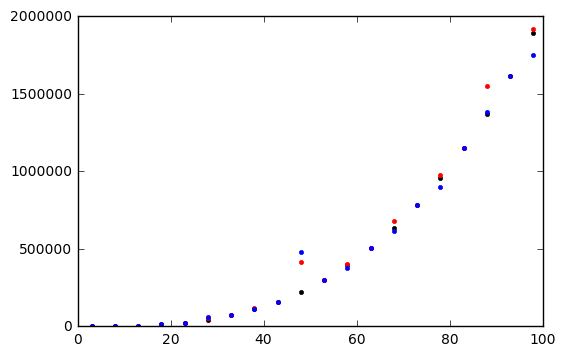

In [62]:
pl.clf()
multiplyResults = []
multiplyDCResults = []
strassenResults = []
x = np.arange(3,103,5)
acct = Counter()

for i in x:
    A = np.random.randint(10,size=(i,i))
    B = np.random.randint(10,size=(i,i))
    acct.reset()
    acctMatrixMultiply(A, B, acct)
    multiplyResults.append(acct.steps)
    acct.reset()
    acctMatrixMultiplyDC(A, B, acct)
    multiplyDCResults.append(acct.steps)
    acct.reset()
    acctMatrixStrassen(A, B, acct)
    strassenResults.append(acct.steps)

y1 = np.array(multiplyResults)
y2= np.array(multiplyDCResults)
y3 = np.array(strassenResults)
pl.plot(x, y1, 'k.', x, y2, 'r.', x, y3, 'b.')

In [ ]:
En tiempo de Ejecución

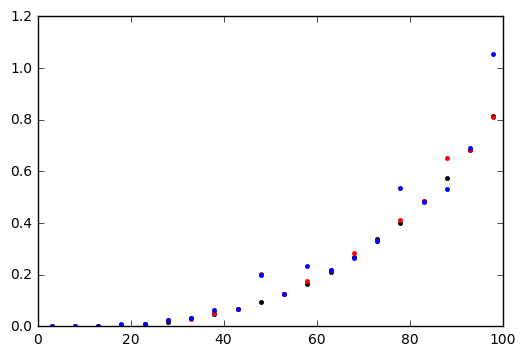

In [64]:
pl.clf()
multiplyResults = []
multiplyDCResults = []
strassenResults = []
x = np.arange(3,103,5)

for i in x:
    A = np.random.randint(9,size=(i,i))
    B = np.random.randint(9,size=(i,i))
    tic = time.clock() #get start time
    matrixMultiply(A, B)
    toc = time.clock() #get end time
    multiplyResults.append(toc-tic)
    
    tic = time.clock() #get start time
    matrixMultiplyDC(A, B)
    toc = time.clock() #get end time
    multiplyDCResults.append(toc-tic)
    
    tic = time.clock() #get start time 
    matrixStrassen(A, B)
    toc = time.clock() #get end time
    strassenResults.append(toc-tic)

y1 = np.array(multiplyResults)
y2= np.array(multiplyDCResults)
y3 = np.array(strassenResults)
pl.plot(x, y1, 'k.', x, y2, 'r.', x, y3, 'b.')